# Diabetes Prediction (EDA & Models)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

## Load Data

In [2]:
data = pd.read_csv('./diabetes.csv')

## Data Information

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [49]:
# Check Null Values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visualization (EDA)

### Correlation Matrix

In data analysis and modeling, it is important to understand the relationships between variables within a dataset, which can be related for various reasons. The statistical relationship between two variables is known as their correlation, which can be positive if both variables move in the same direction, negative if one variable's value increases while the other variable's value decreases, or neutral/zero if the variables are not related. Understanding correlation can be helpful in gaining insights from the data and developing models.

<AxesSubplot:>

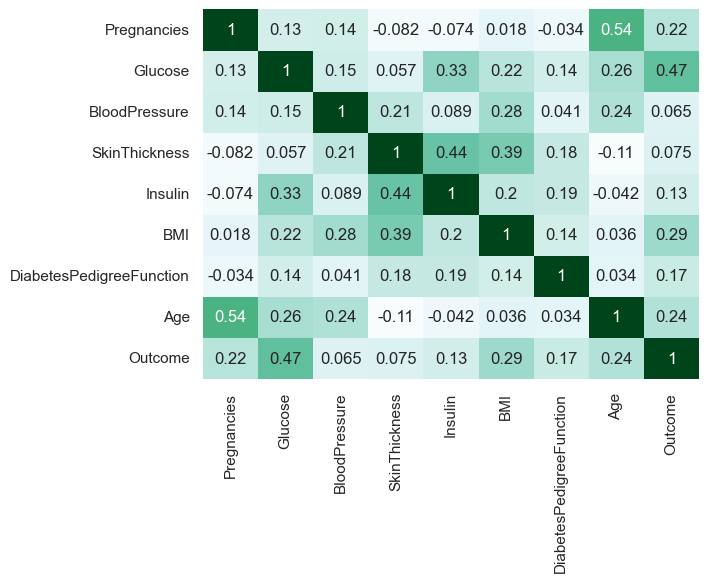

In [13]:
sns.heatmap(data.corr(), cbar=False, cmap='BuGn', annot=True)

Is it possible for the minimum value of the columns listed below to be zero (0)? If so, a value of zero would not be meaningful and would be considered as a missing value in these columns.

Following columns or variables have an invalid zero value:

- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [14]:
col = ['Glucose',
       'BloodPressure', 
       'SkinThickness',
       'Insulin',
       'BMI']

In [15]:
for i in col:
    data[i].replace(0, data[i].mean(), inplace=True)

### Histogram of Columns

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

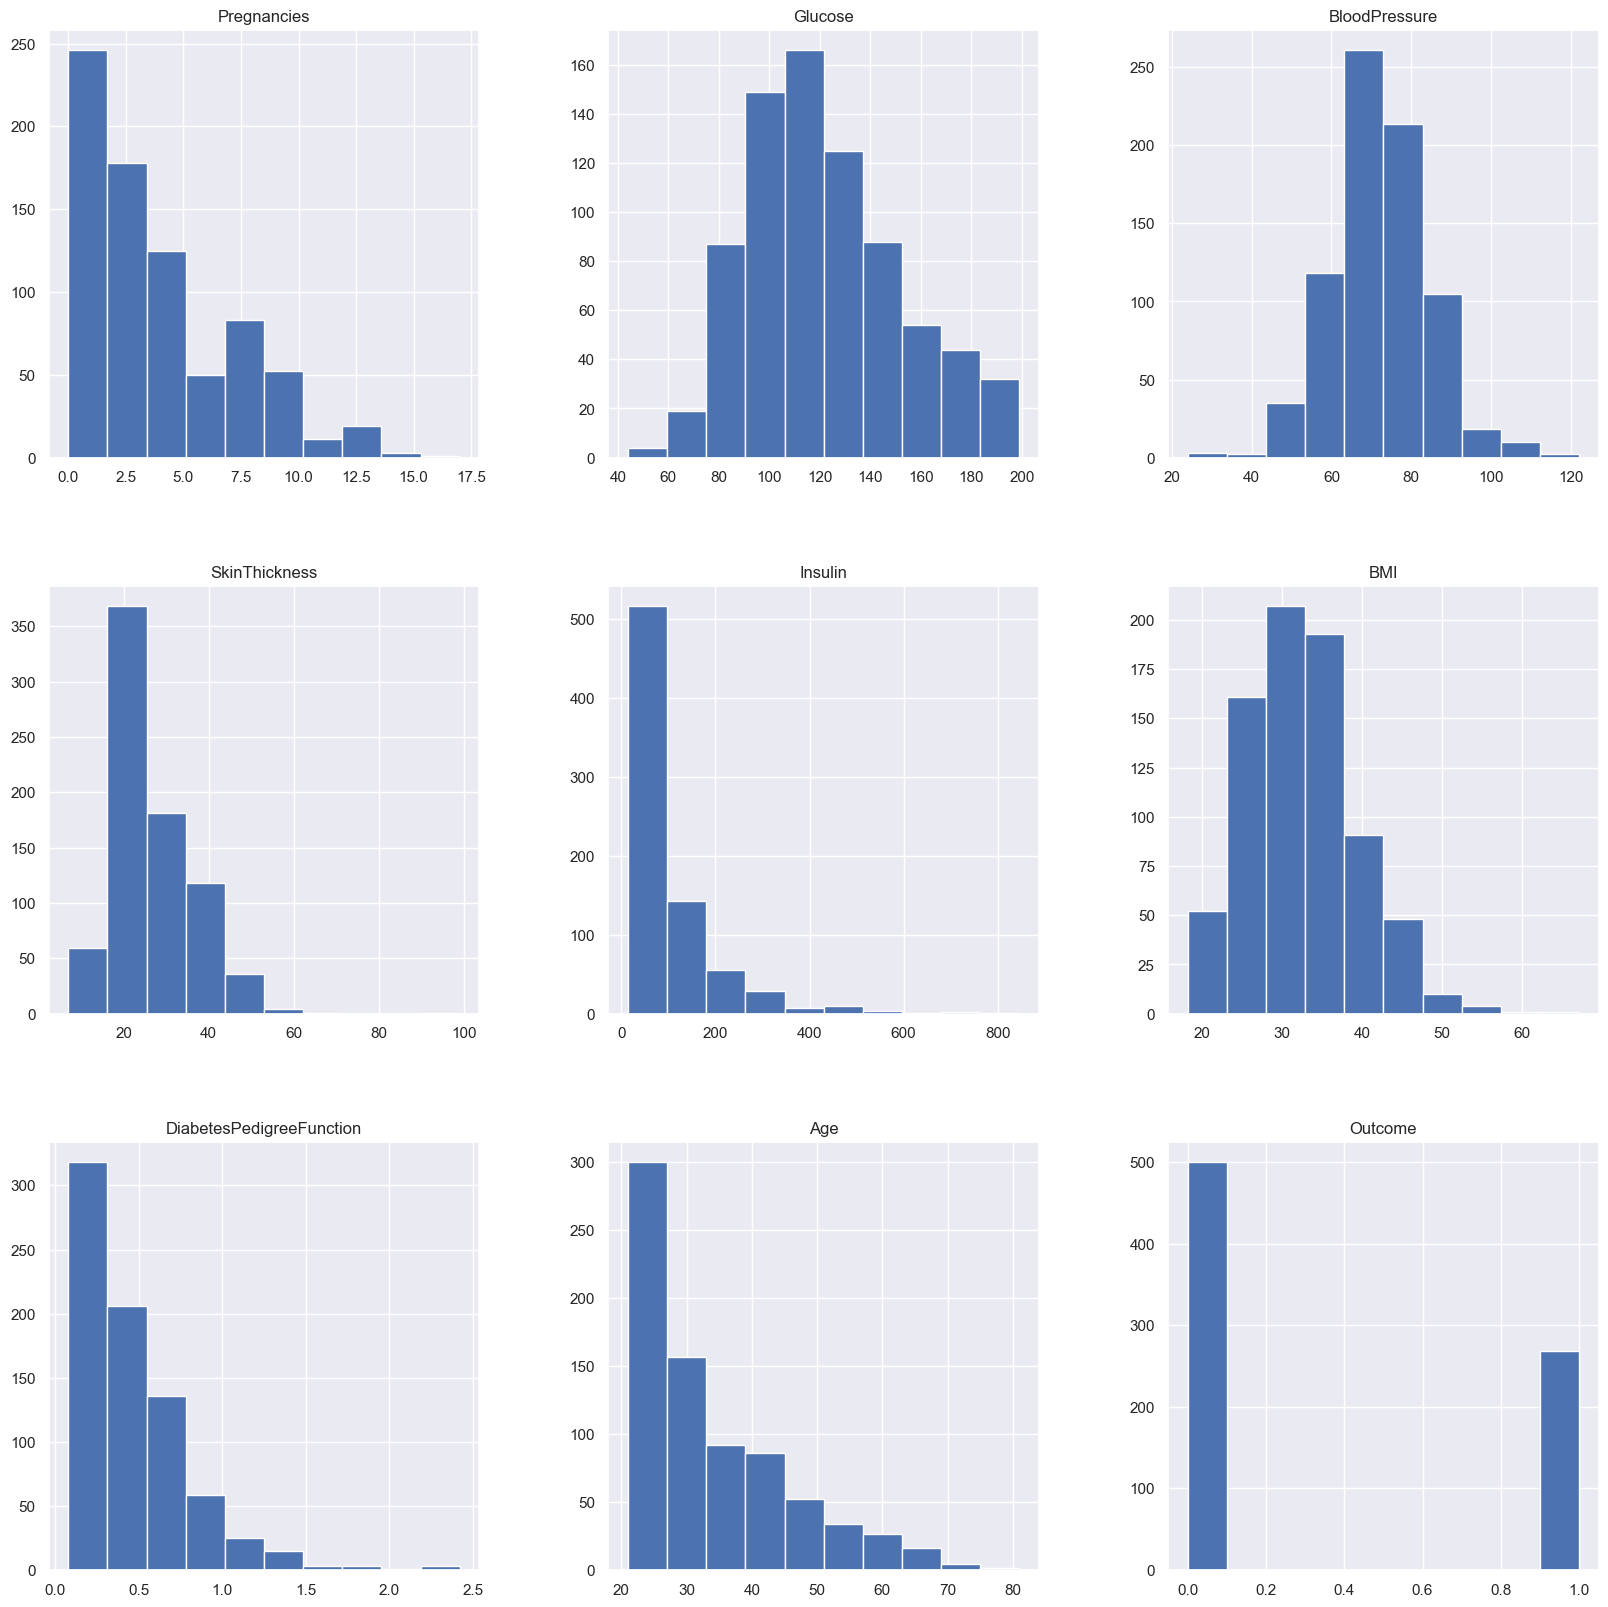

In [16]:
data.hist(figsize=(20,20))

### Pointplot (Outcome to Age)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

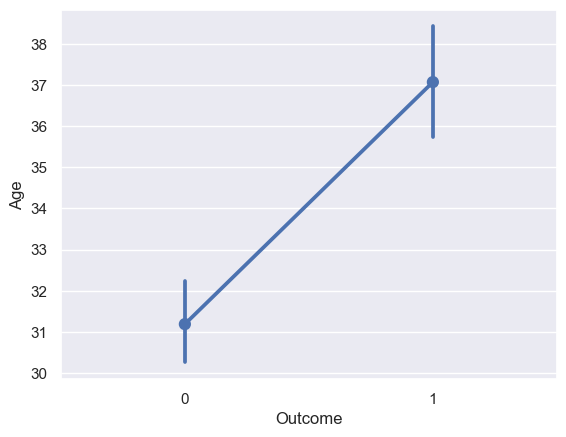

In [17]:
sns.pointplot(x='Outcome', y= 'Age', data=data)

### Scatterplot (Age to Insulin)

<AxesSubplot:xlabel='Age', ylabel='Insulin'>

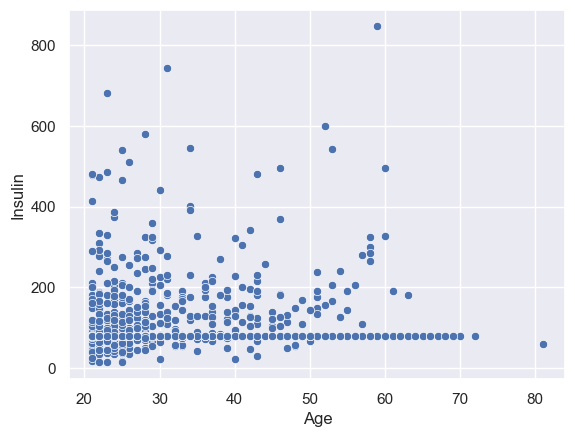

In [18]:
sns.scatterplot(x='Age', y='Insulin', data=data)

### Boxplot (Outcome to Pregnancies)

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

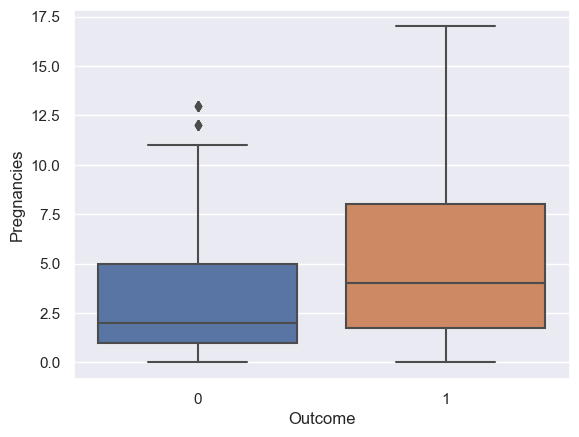

In [19]:
sns.boxplot(x='Outcome', y='Pregnancies', data=data)

### Pairplot

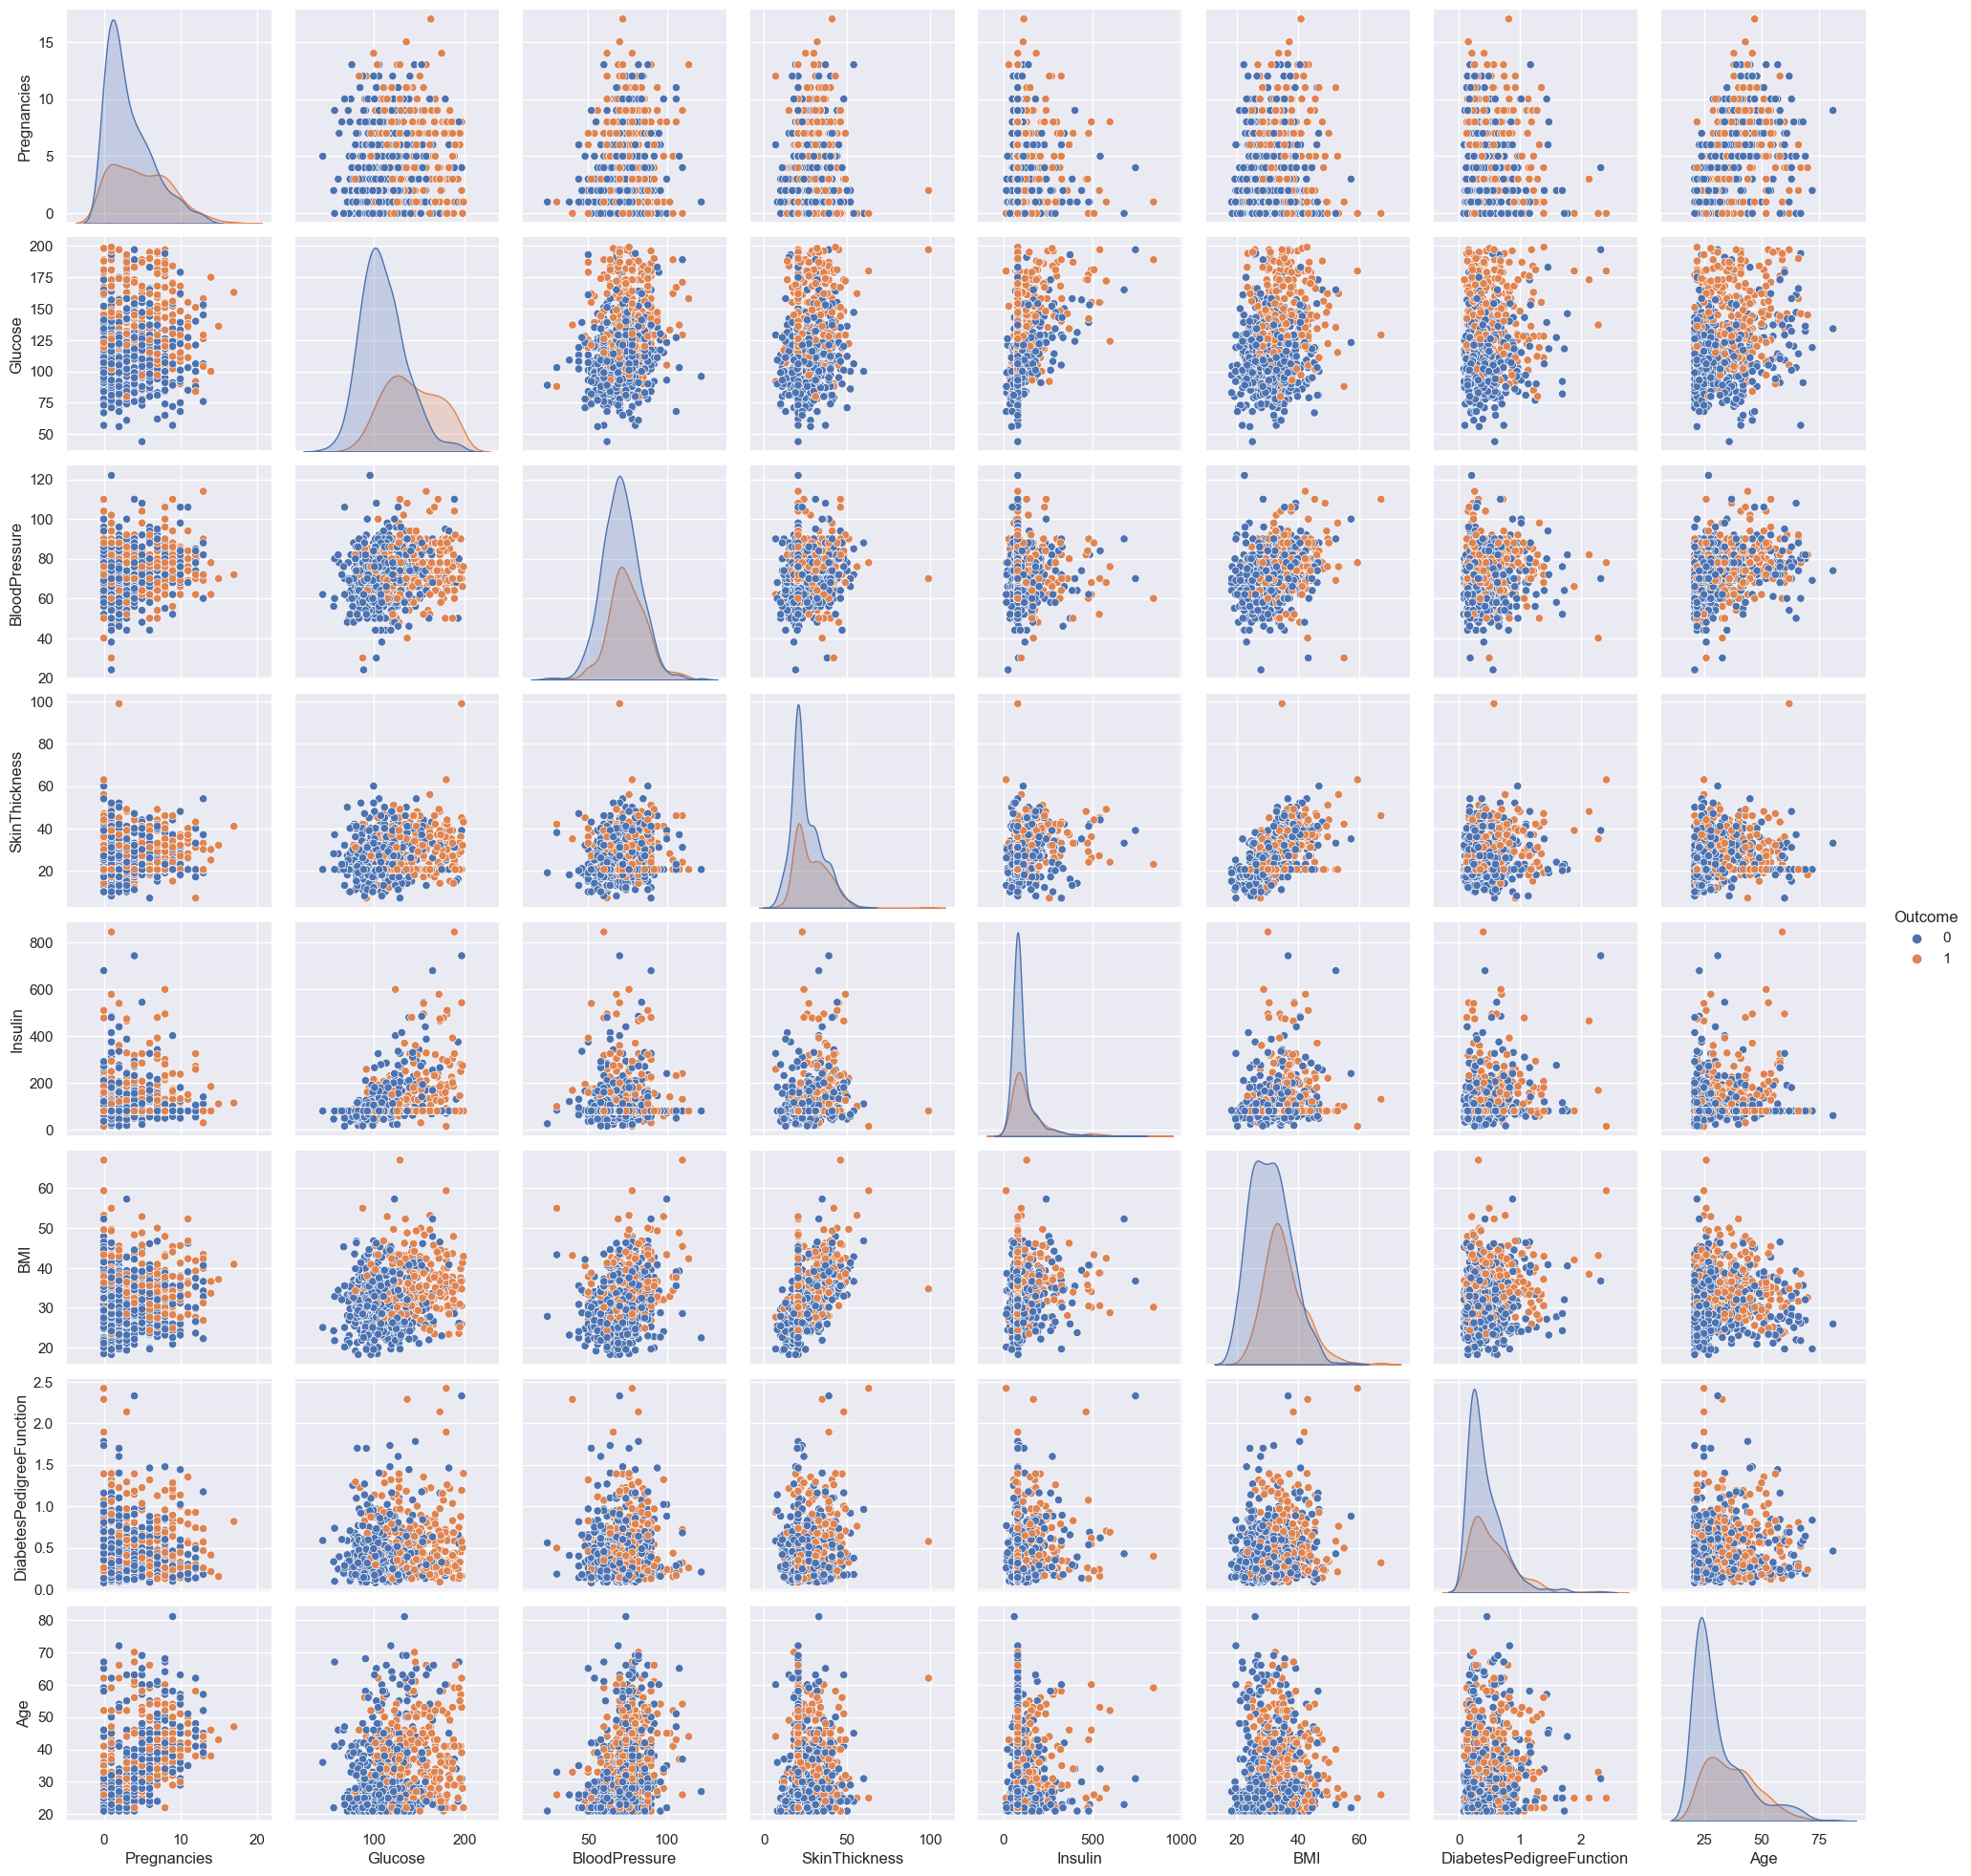

In [20]:
sns.pairplot(data, hue='Outcome')

### Strip Plot (Pregnancies to Age)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

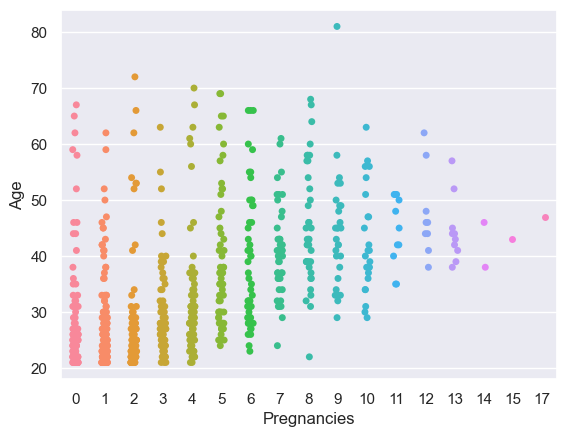

In [21]:
sns.stripplot(x='Pregnancies', y='Age', data=data)

### Regplot (SkinThickness to Insulin)

<AxesSubplot:xlabel='SkinThickness', ylabel='Insulin'>

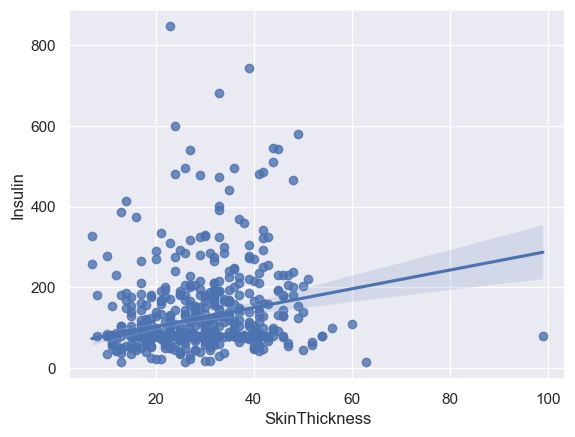

In [22]:
sns.regplot(x='SkinThickness', y='Insulin', data=data)

### Swarmplot (Pregnancies to Age with Outcome)

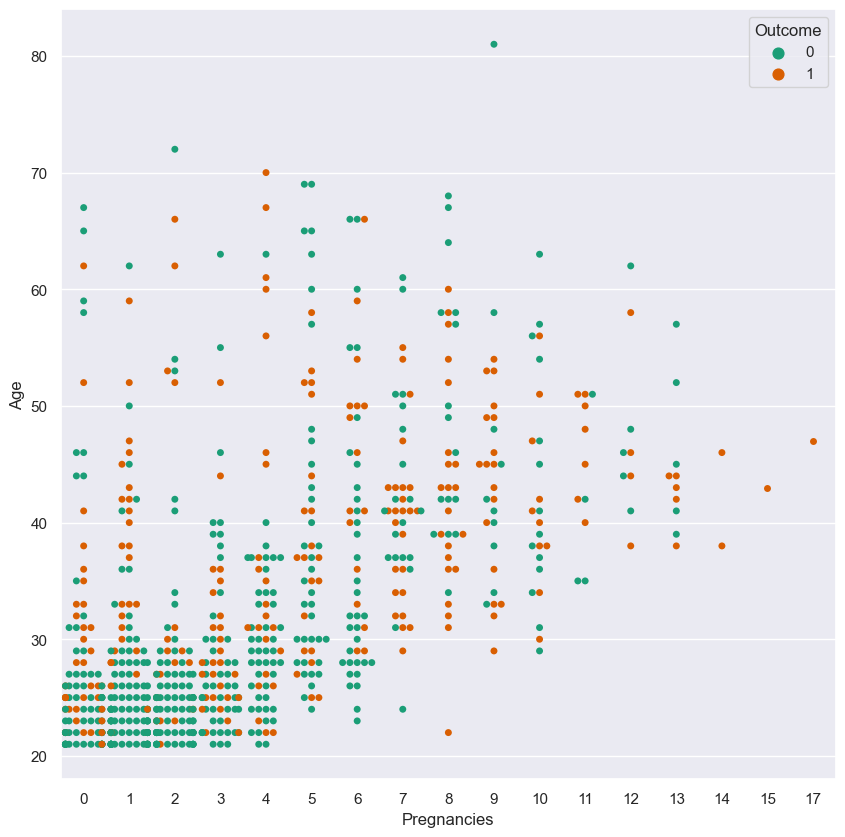

In [23]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.swarmplot(x="Pregnancies", y="Age", hue="Outcome", palette="Dark2", data=data)
ax = sns.set(style="darkgrid")

### Regplot (Insulin to data)

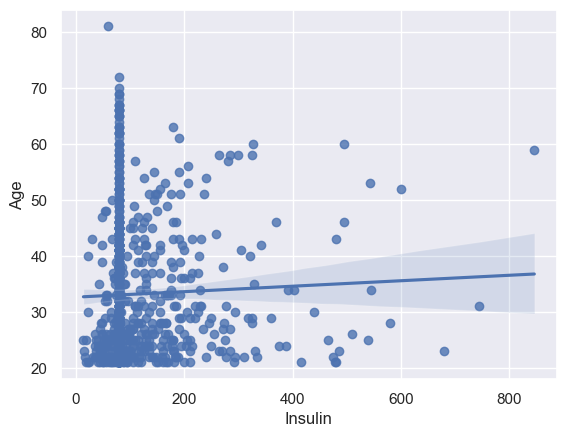

In [24]:
g = sns.regplot(x="Insulin", y='Age', data=data)

In [25]:
data.var()

Pregnancies                   11.354056
Glucose                      926.351048
BloodPressure                146.795798
SkinThickness                 92.760798
Insulin                     8663.952981
BMI                           47.270761
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Outcome                        0.227483
dtype: float64

## Scale data

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data.drop(['Outcome'], axis=1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [27]:
y = data.Outcome

## Split Data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=30, random_state=3)

## Models

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1,penalty='l2')
log_reg.fit(X_train,Y_train)

log_acc=accuracy_score(Y_test,log_reg.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,log_reg.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,log_reg.predict(X_test))*100))

Train Set Accuracy:77.64227642276423
Test Set Accuracy:76.66666666666667


## K-Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)                #knn classifier
knn.fit(X_train,Y_train)

knn_acc = accuracy_score(Y_test,knn.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,knn.predict(X_test))*100))

Train Set Accuracy:80.08130081300813
Test Set Accuracy:70.0


## SVC

In [33]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,Y_train)    

svm_acc= accuracy_score(Y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(Y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,svm.predict(X_test))*100))

Train Set Accuracy:82.11382113821138
Test Set Accuracy:73.33333333333333


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, Y_train)


dtc_acc= accuracy_score(Y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,dtc.predict(X_test))*100))

Train Set Accuracy:82.92682926829268
Test Set Accuracy:86.66666666666667


## Gradient Boosting

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)


gbc_acc=accuracy_score(Y_test,gbc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,gbc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,gbc.predict(X_test))*100))

Train Set Accuracy:91.05691056910568
Test Set Accuracy:80.0


## XGBoost

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth=6,n_estimators = 10)
xgb.fit(X_train,Y_train)

xgb_acc= accuracy_score(Y_test,xgb.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(Y_train,xgb.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(Y_test,xgb.predict(X_test))*100))

Train Set Accuracy:90.10840108401084
Test Set Accuracy:80.0


## Stacking

Stacking is an ensemble technique that involves using two or more classifiers as base models. The predictions made by these base models are then used as input (i.e., the "x" value) for another model known as the meta-model, which produces the final prediction.

In [37]:
from sklearn.model_selection import train_test_split

train,val_train,test,val_test = train_test_split(X,y,test_size=.50,random_state=3)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=.20,random_state=3)

In [39]:
#first model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
# second model
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [41]:
pred_1=knn.predict(val_train)
pred_2=svm.predict(val_train)

# addition of 2 predictions
result = np.column_stack((pred_1,pred_2))

In [42]:
pred_test1=knn.predict(x_test)
pred_test2=svm.predict(x_test)


predict_test=np.column_stack((pred_test1,pred_test2))

In [43]:
# stacking classifier
#RandomForestClasifier:- In this prediction of other 2 classification is taken as x value
from sklearn.ensemble import RandomForestClassifier
rand_clf = RandomForestClassifier()
rand_clf.fit(result,val_test)                   
                                

RandomForestClassifier()

In [44]:
rand_clf.score(result,val_test)

0.7291666666666666

In [45]:
rand_acc=accuracy_score(y_test ,rand_clf.predict(predict_test))
rand_acc

0.7922077922077922

In [46]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Gradient Boosting Classifier',  'XgBoost','Stacking'],
    'Score': [ log_acc,knn_acc, svm_acc, dtc_acc, gbc_acc, xgb_acc,rand_acc,]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Decision Tree Classifier,0.866667
4,Gradient Boosting Classifier,0.800000
5,XgBoost,0.800000
6,Stacking,0.792208
0,Logistic,0.766667
2,SVC,0.733333
1,KNN,0.700000


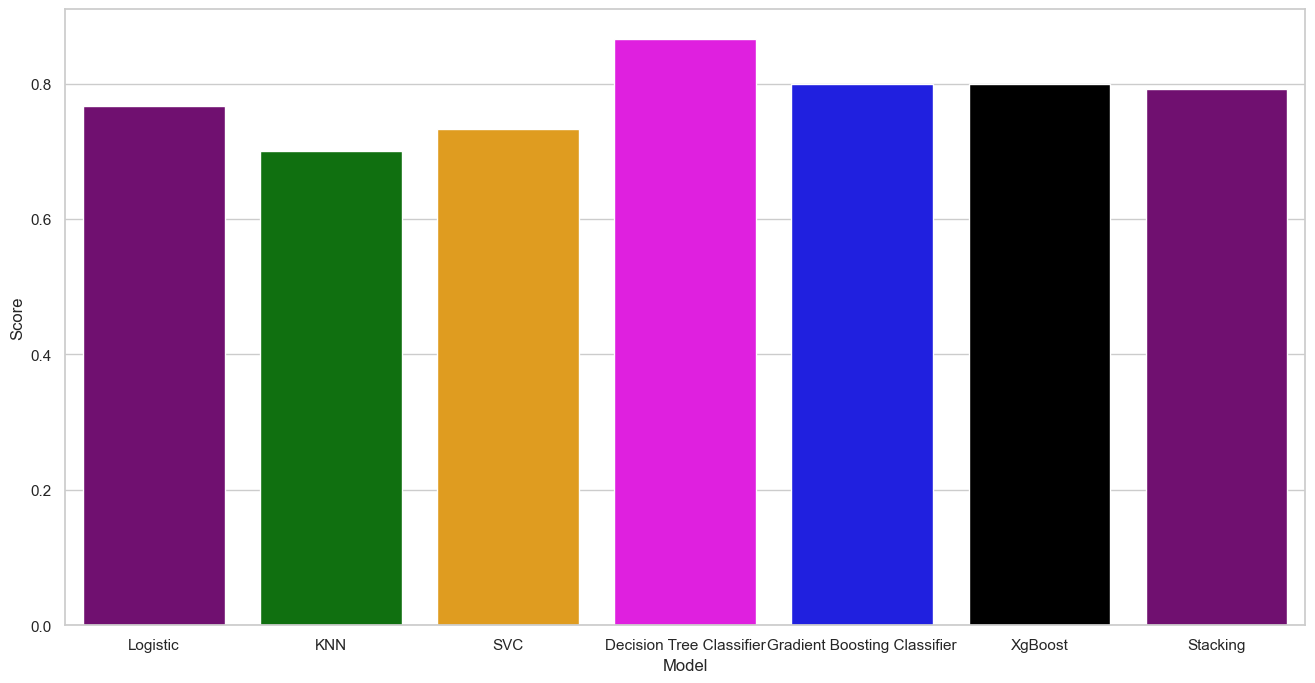

In [47]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()